In [5]:
__author__ = 'Linda Jaber, CUSP NYU 2018'
from __future__ import print_function

import os
import pandas as pd

%pylab inline

pylab.rcParams['figure.figsize'] = 12, 8
pylab.rcParams['figure.dpi'] = 100

Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv('PUIDATA')
if puidata is None:
    os.environ['PUIDATA']='%s/PUIdata'%os.getenv('HOME')
    puidata = os.getenv('PUIDATA')
print('puidata: ', puidata) 

puidata:  /nfshome/lj1232/PUIdata


In [3]:
!curl https://data.cityofnewyork.us/api/views/k46n-sa2m/rows.csv?accessType=DOWNLOAD > dhsdaily.csv
!mv dhsdaily.csv $puidata


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  143k    0  143k    0     0   379k      0 --:--:-- --:--:-- --:--:--  380k


In [4]:
!ls $puidata

201705-citibike-tripdata.csv.zip
201803_citibike_tripdata.csv.zip
311_Service_Requests_from_2010_to_Present_head.csv
311_Service_Requests_from_2010_to_Present_short.csv
ACS_16_1YR_GCT2801
dhsdaily.csv
DOB_Complaints_311.csv
JC-201705-citibike-tripdata.csv
JC-201803-citibike-tripdata.csv
linkNYClocations.csv
NYPD_7_Major_Felony_Incidents.csv
PLUTO_for_WEB
PUMA_NYC_shapefile
times.txt


In [5]:
dhs = pd.read_csv(puidata + '/dhsdaily.csv')
dhs.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
0,08/21/2013,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811
1,08/22/2013,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827
2,08/23/2013,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826
3,08/24/2013,28274,21343,49617,7110,2690,9800,10291,14650,21343,35993,1801,3824
4,08/25/2013,28458,21400,49858,7230,2704,9934,10324,14694,21400,36094,1804,3830


In [6]:
dhs.columns

Index(['Date of Census', 'Total Adults in Shelter',
       'Total Children in Shelter', 'Total Individuals in Shelter',
       'Single Adult Men in Shelter', 'Single Adult Women in Shelter',
       'Total Single Adults in Shelter', 'Families with Children in Shelter',
       'Adults in Families with Children in Shelter',
       'Children in Families with Children in Shelter',
       'Total Individuals in Families with Children in Shelter ',
       'Adult Families in Shelter',
       'Individuals in Adult Families in Shelter'],
      dtype='object')

In [7]:
dhs.size

24050

In [8]:
dhs_2c = dhs[['Total Children in Shelter', 'Adult Families in Shelter']]

In [9]:
dhs_2c.head()

,Total Children in Shelter,Adult Families in Shelter
0,21314,1796
1,21324,1803
2,21291,1802
3,21343,1801
4,21400,1804


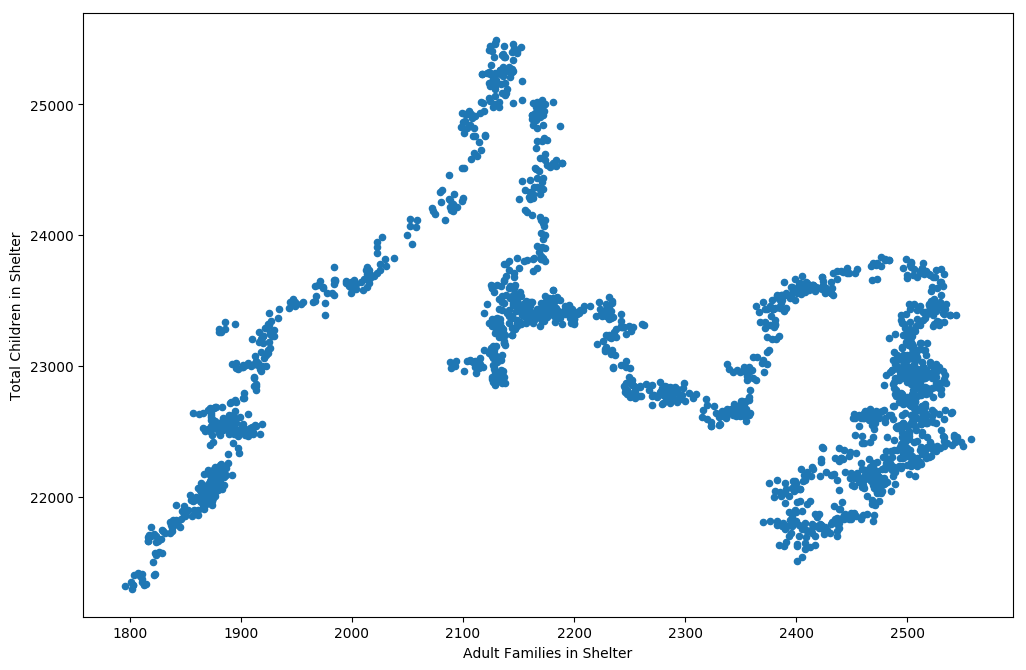

In [10]:
dhs_2c.plot(y='Total Children in Shelter', x='Adult Families in Shelter', kind='scatter')

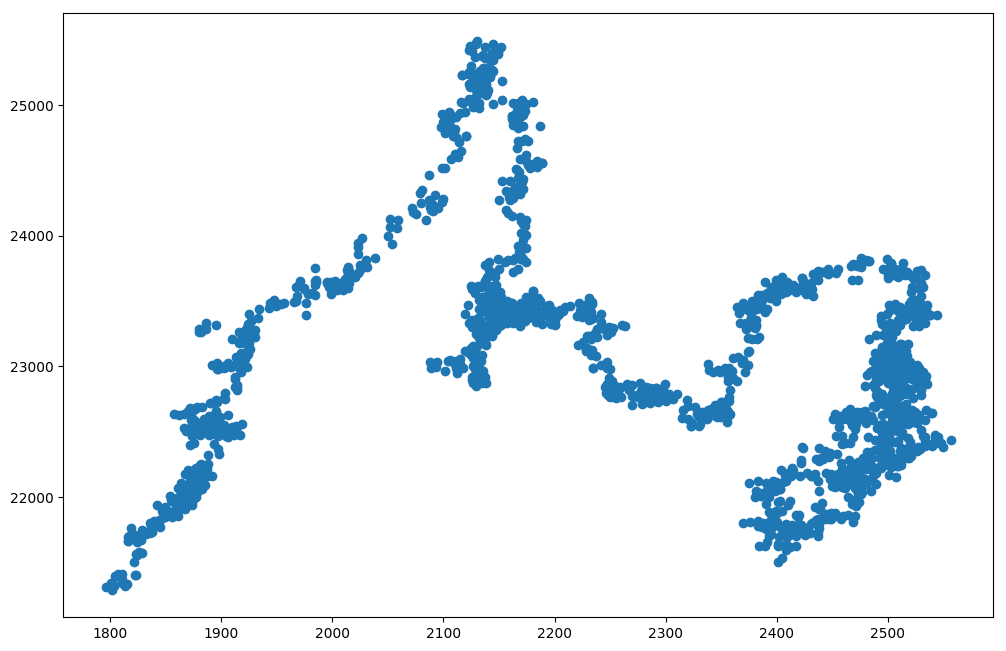

In [11]:
import matplotlib.pyplot as plt
plt.scatter(dhs_2c['Adult Families in Shelter'], dhs_2c['Total Children in Shelter'])

In [18]:
url = 'https://data.cityofnewyork.us/resource/wece-v9d7.json'
df = pd.read_json(url)

In [19]:
df.head()

,adult_families_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,date_of_census,families_with_children_in_shelter,individuals_in_adult_families_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,total_individuals_in_shelter,total_single_adults_in_shelter
0,1796,14607,21314,2013-08-21T00:00:00.000,10261,3811,7231,2710,28359,21314,35921,49673,9941
1,1803,14622,21324,2013-08-22T00:00:00.000,10274,3827,7201,2716,28366,21324,35946,49690,9917
2,1802,14611,21291,2013-08-23T00:00:00.000,10266,3826,7149,2671,28257,21291,35902,49548,9820
3,1801,14650,21343,2013-08-24T00:00:00.000,10291,3824,7110,2690,28274,21343,35993,49617,9800
4,1804,14694,21400,2013-08-25T00:00:00.000,10324,3830,7230,2704,28458,21400,36094,49858,9934


In [20]:
df.columns

Index(['adult_families_in_shelter',
       'adults_in_families_with_children_in_shelter',
       'children_in_families_with_children_in_shelter', 'date_of_census',
       'families_with_children_in_shelter',
       'individuals_in_adult_families_in_shelter',
       'single_adult_men_in_shelter', 'single_adult_women_in_shelter',
       'total_adults_in_shelter', 'total_children_in_shelter',
       'total_individuals_in_families_with_children_in_shelter_',
       'total_individuals_in_shelter', 'total_single_adults_in_shelter'],
      dtype='object')

In [21]:
df_3c = df [['date_of_census', 'total_children_in_shelter', 'adult_families_in_shelter']]

In [22]:
df_3c.head()

,date_of_census,total_children_in_shelter,adult_families_in_shelter
0,2013-08-21T00:00:00.000,21314,1796
1,2013-08-22T00:00:00.000,21324,1803
2,2013-08-23T00:00:00.000,21291,1802
3,2013-08-24T00:00:00.000,21343,1801
4,2013-08-25T00:00:00.000,21400,1804


In [23]:
df_3c.columns = ['Date of Census', 'Total Children in Shelter', 'Adult Families in Shelter']

In [24]:
df_3c.head()

,Date of Census,Total Children in Shelter,Adult Families in Shelter
0,2013-08-21T00:00:00.000,21314,1796
1,2013-08-22T00:00:00.000,21324,1803
2,2013-08-23T00:00:00.000,21291,1802
3,2013-08-24T00:00:00.000,21343,1801
4,2013-08-25T00:00:00.000,21400,1804


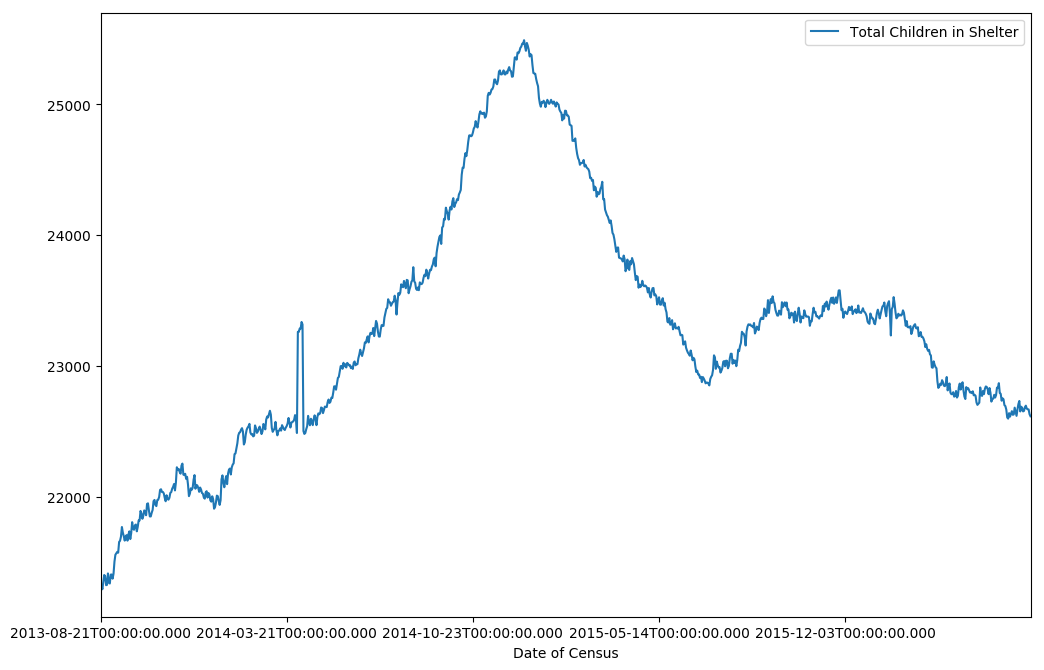

In [25]:
ax = df_3c.plot(x='Date of Census', y='Total Children in Shelter')

In [35]:
pd.to_datetime(df_3c['Date of Census']).head()

0   2013-08-21
1   2013-08-22
2   2013-08-23
3   2013-08-24
4   2013-08-25
Name: Date of Census, dtype: datetime64[ns]

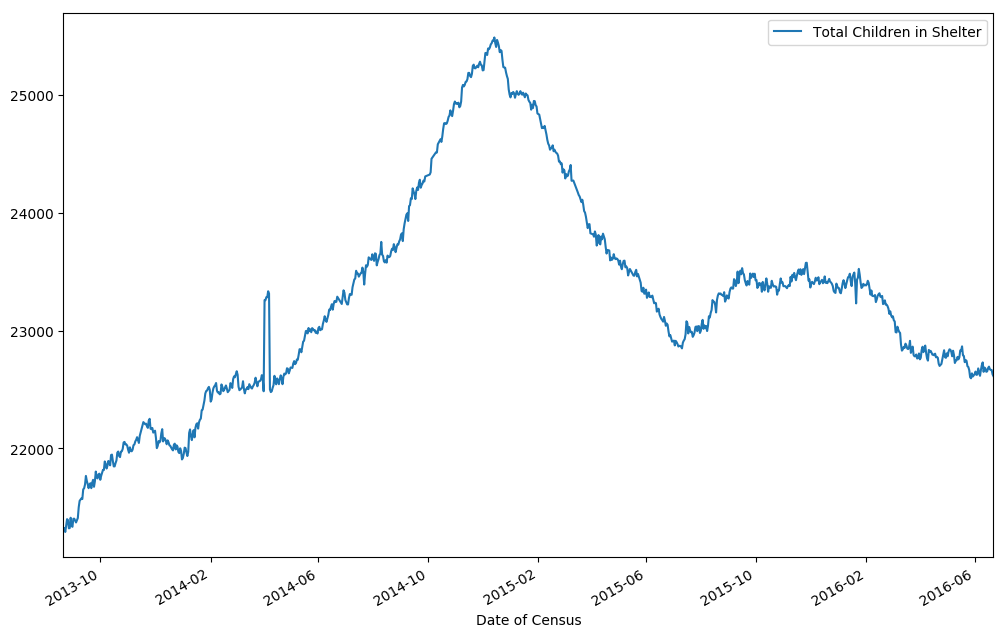

In [30]:
ax = df_3c.plot(x='Date of Census', y='Total Children in Shelter')

In [3]:
import json
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

In [20]:
url = 'https://data.cityofnewyork.us/resource/wece-v9d7.json'
response = urllib.urlopen(url)
data = response.read().decode('utf-8')
data = json.loads(data)

In [21]:
type(data)

list

In [22]:
len(data)

1000

In [23]:
type(data[1])

dict

In [24]:
data[1].keys()

dict_keys(['families_with_children_in_shelter', 'adult_families_in_shelter', 'date_of_census', 'single_adult_women_in_shelter', 'total_single_adults_in_shelter', 'total_children_in_shelter', 'total_adults_in_shelter', 'single_adult_men_in_shelter', 'individuals_in_adult_families_in_shelter', 'total_individuals_in_families_with_children_in_shelter_', 'children_in_families_with_children_in_shelter', 'adults_in_families_with_children_in_shelter', 'total_individuals_in_shelter'])

In [25]:
data[1]

{'adult_families_in_shelter': '1803',
 'adults_in_families_with_children_in_shelter': '14622',
 'children_in_families_with_children_in_shelter': '21324',
 'date_of_census': '2013-08-22T00:00:00.000',
 'families_with_children_in_shelter': '10274',
 'individuals_in_adult_families_in_shelter': '3827',
 'single_adult_men_in_shelter': '7201',
 'single_adult_women_in_shelter': '2716',
 'total_adults_in_shelter': '28366',
 'total_children_in_shelter': '21324',
 'total_individuals_in_families_with_children_in_shelter_': '35946',
 'total_individuals_in_shelter': '49690',
 'total_single_adults_in_shelter': '9917'}

In [26]:
data[1]['adult_families_in_shelter']

'1803'

In [4]:
#response = urllib.urlopen('VM.json')
#data = response.read().decode('utf-8')
data = json.loads('VM.json')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
pd.read_json('VM.json')
data['Siri']

ServiceDelivery    {'ResponseTimestamp': '2018-10-26T13:24:12.993...
Name: Siri, dtype: object

In [11]:
data = pd.read_json('MTA_API_BUS.json')
data['Siri']

ServiceDelivery    {'ResponseTimestamp': '2018-10-26T13:24:12.993...
Name: Siri, dtype: object

In [ ]:
data.